<a href="https://colab.research.google.com/github/Vignesh-S-Go/Prodigy_DS_04/blob/main/Prodigy_TS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


# Load Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

# Load the data without a header and assign column names
data = pd.read_csv(list(uploaded.keys())[0], header=None, names=['ID', 'Topic', 'Sentiment', 'TweetText'])
data.head()

Saving twitter_training.csv to twitter_training.csv


,ID,Topic,Sentiment,TweetText
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


#Basic Preprocessing
#1)Handle missing values.

#2)Clean text: remove punctuation, convert to lowercase, remove stopwords.

#Visualize Sentiment Distribution

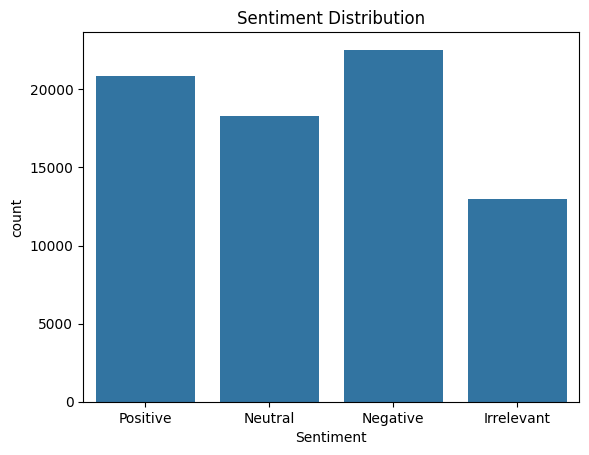

In [3]:
sns.countplot(x='Sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

#Generate Word Clouds

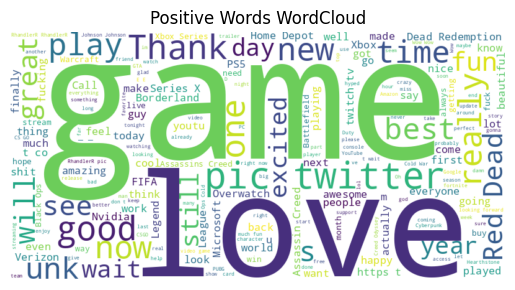

In [5]:
positive = data[data['Sentiment']=='Positive']['TweetText'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words WordCloud')
plt.show()

✅ WordCloud for Negative Sentiment

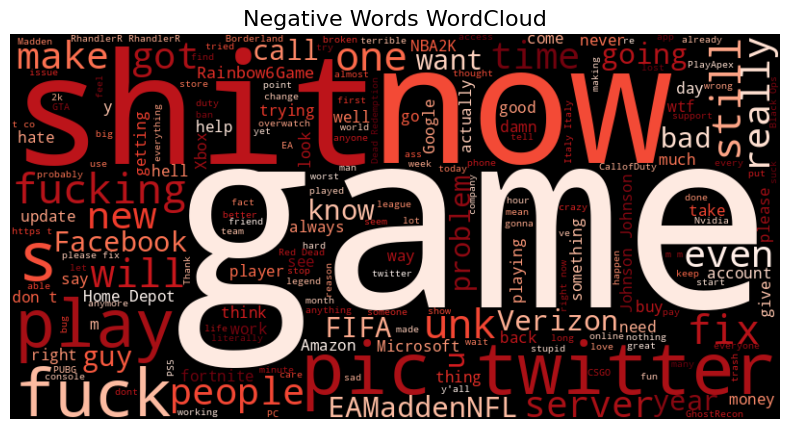

In [7]:
negative = data[data['Sentiment'] == 'Negative']['TweetText'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words WordCloud', fontsize=16)
plt.show()




✅ WordCloud for Neutral Sentiment

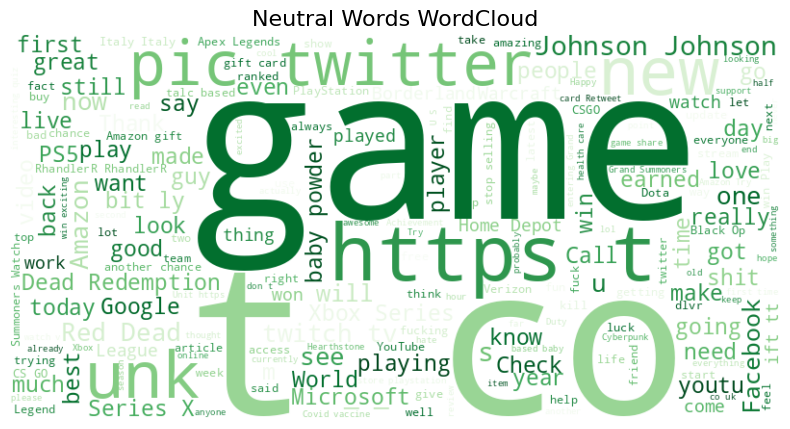

In [8]:
neutral = data[data['Sentiment'] == 'Neutral']['TweetText'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(neutral)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Words WordCloud', fontsize=16)
plt.show()


#Build a Simple Sentiment Classifier

              precision    recall  f1-score   support

  Irrelevant       0.95      0.45      0.61      2696
    Negative       0.67      0.90      0.77      4380
     Neutral       0.83      0.64      0.73      3605
    Positive       0.70      0.83      0.76      4119

    accuracy                           0.73     14800
   macro avg       0.79      0.70      0.72     14800
weighted avg       0.77      0.73      0.73     14800



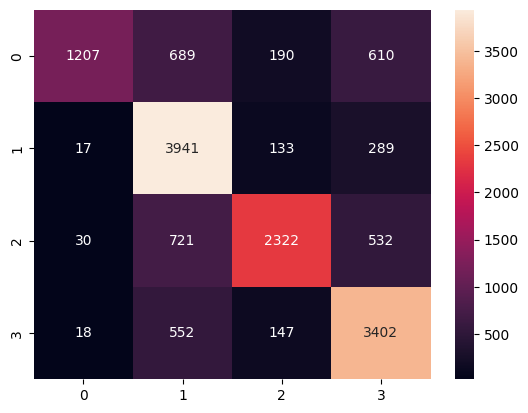

In [11]:

data.dropna(subset=['TweetText'], inplace=True)

X = data['TweetText']
y = data['Sentiment']


vectorizer = TfidfVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()